In [160]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [161]:
df=pd.read_csv("location_rev.csv")
df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3,30527.57,1407,3302,12
1,38628.37,3,30185.49,1025,4422,11
2,39715.16,1,32182.24,1498,3260,12
3,35593.30,5,29728.65,2340,4325,10
4,35128.18,4,30691.17,847,3774,11


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   revenue              1000 non-null   float64
 1   num_competitors      1000 non-null   int64  
 2   median_income        1000 non-null   float64
 3   num_loyalty_members  1000 non-null   int64  
 4   population_density   1000 non-null   int64  
 5   location_age         1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [163]:
df.describe()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38433.469330,3.397000,31360.668500,1597.200000,3351.199000,11.041000
std,11665.825242,1.016082,3943.278358,496.874663,975.664263,3.034885
min,5000.000000,0.000000,20000.000000,0.000000,0.000000,0.000000
25%,30277.897500,3.000000,28792.592500,1253.000000,2689.250000,9.000000
50%,38323.095000,3.000000,31134.555000,1605.000000,3353.000000,11.000000
75%,45894.670000,4.000000,34050.992500,1925.250000,4017.000000,13.000000
max,79342.070000,7.000000,43676.900000,3280.000000,6489.000000,24.000000


std khá lớn khiến mô hình linear không chạy tốt

In [164]:
df.corr()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


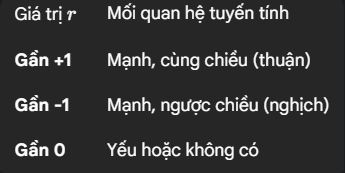

<Axes: xlabel='median_income', ylabel='revenue'>

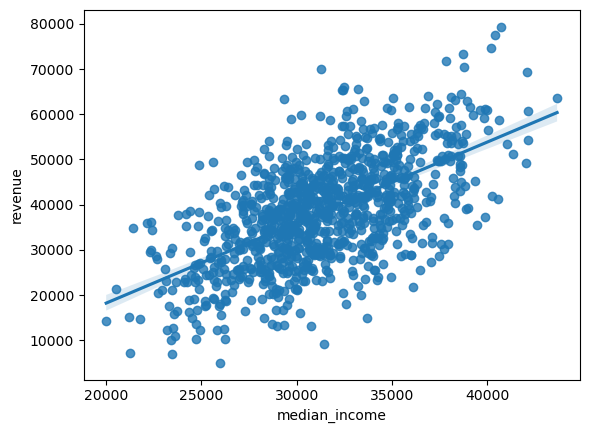

In [165]:
sns.regplot(y=df.revenue,x=df.median_income)

regplot là đồ thị của seaborn cho, kết hợp giữa scatter và đường linear để đánh giá trực quan về các mối quan hệ giữa 2 biến

<Axes: xlabel='median_income', ylabel='revenue'>

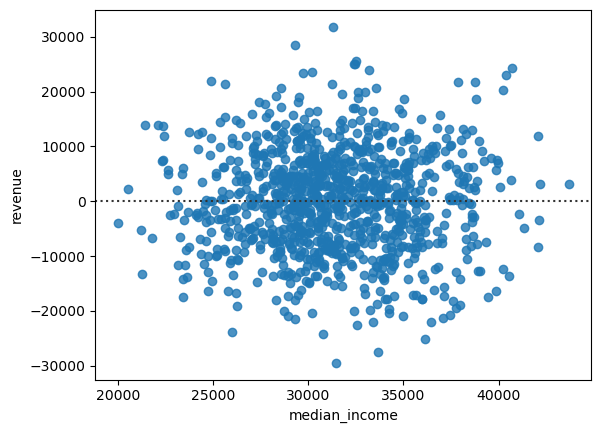

In [166]:
sns.residplot(y=df.revenue,x=df.median_income)

residplot là đồ thị cho biết mức độ tốt của mô hình dựa vào kết quả của y thực tế - y dự đoán, và nó sẽ phân bố xung quanh đường thẳng y=0
vậy nếu các điểm tập trung xung quanh y=0 và gần y=0 thì mô hình tốt

# Build model

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [168]:
X=df[["median_income"]]
Y=df.revenue

In [169]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [170]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [171]:
intercept=model.intercept_
slope=model.coef_[0]
intercept, slope

(np.float64(-18425.484762749933), np.float64(1.8175724925101326))

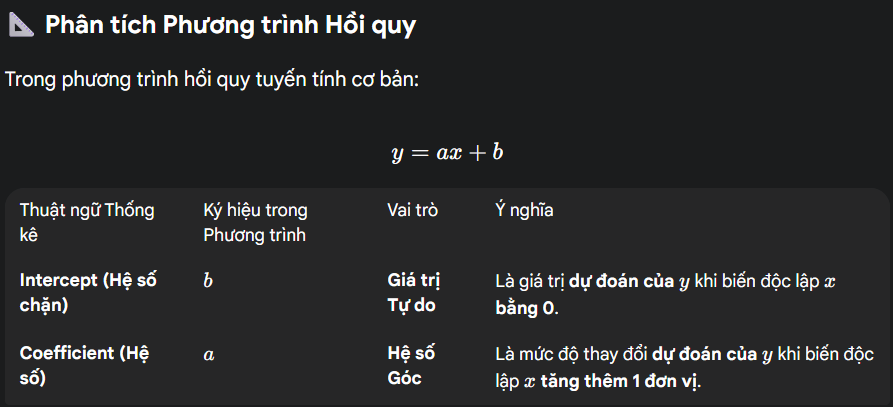

In [ ]:
y_pred=model.predict(X_test)

# Đánh giá model

## R^2

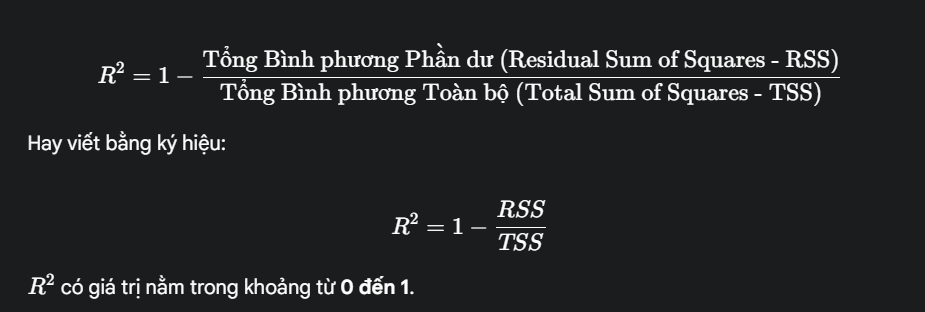
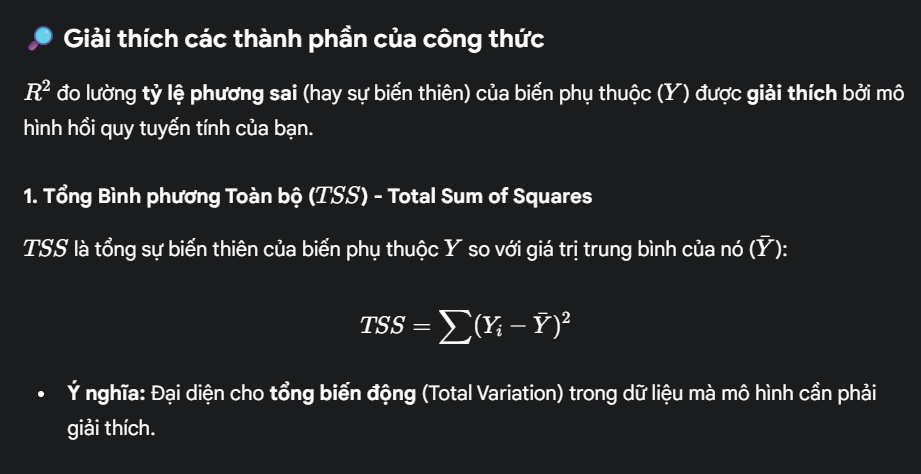
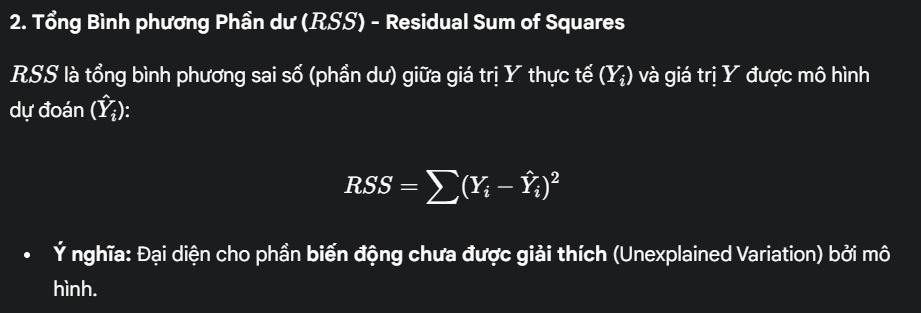
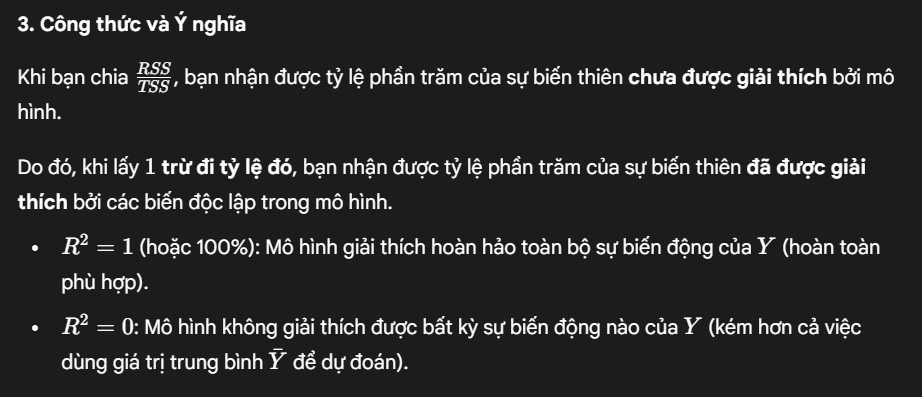

In [173]:
#R2 cho toàn bộ data
model.score(X,Y)

0.36196581290430185

In [174]:
#R2 cho train
model.score(X_train,Y_train)

0.3802741630505214

In [175]:
#R2 cho test
model.score(X_test,Y_test)

0.3186154872023861

# Các đánh giá khác

In [176]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

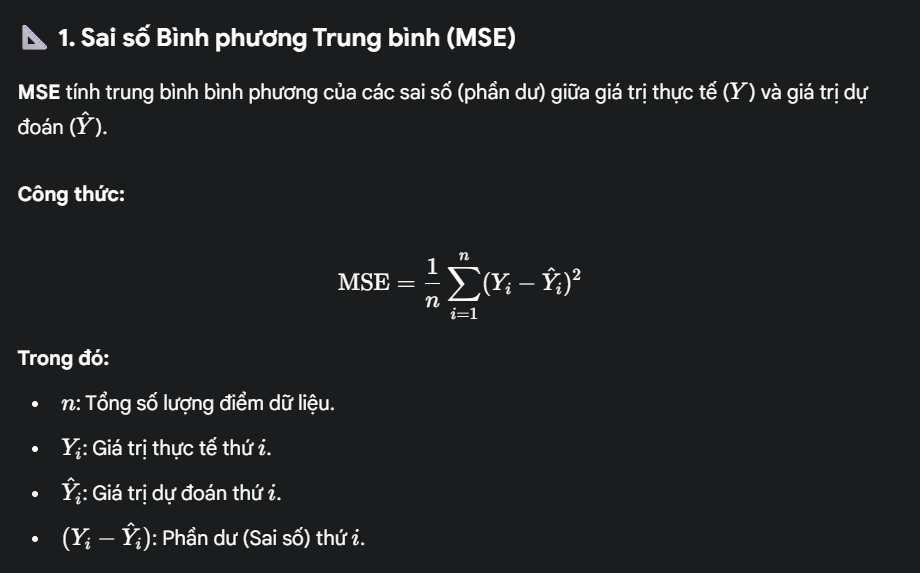

Đặc điểm:Tính nhạy cảm với Outlier: Do sai số được bình phương, MSE nhạy cảm hơn với các sai số lớn (outlier). Các điểm ngoại lai sẽ bị phạt nặng hơn, kéo MSE lên cao.  
Đơn vị: Đơn vị của MSE là bình phương đơn vị của biến phụ thuộc ($Y$). Điều này khiến nó khó diễn giải trực tiếp hơn.

In [178]:
mse=mean_squared_error(y_pred,Y_test)
mse

91722735.61829852

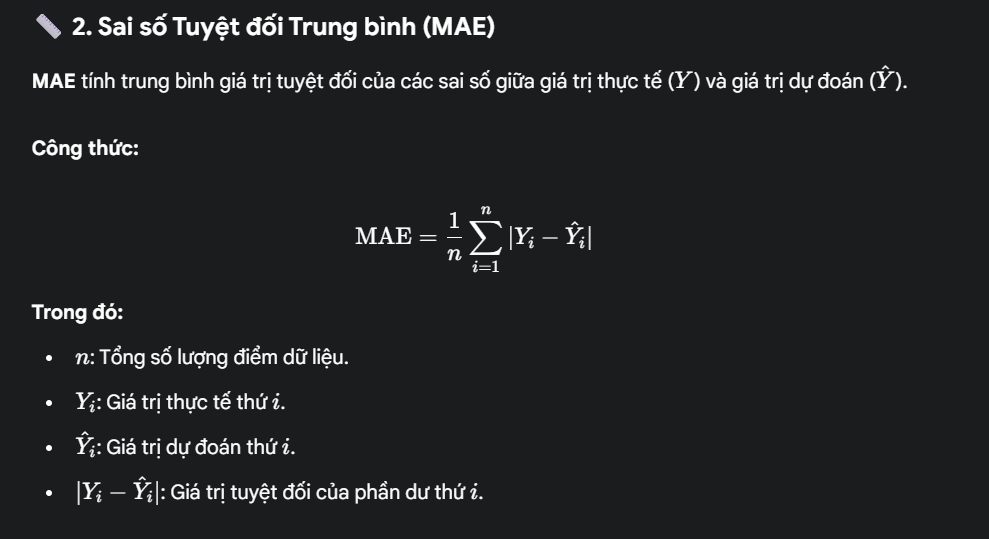

Đặc điểm:Tính ổn định với Outlier: MAE ít nhạy cảm hơn với các sai số lớn (outlier) vì nó không bình phương sai số. Mỗi sai số, dù nhỏ hay lớn, đều đóng góp tuyến tính vào tổng MAE.  
Đơn vị: Đơn vị của MAE giống đơn vị của biến phụ thuộc ($Y$). Điều này khiến nó dễ diễn giải hơn trong ngữ cảnh thực tế.

In [180]:
mae=mean_absolute_error(y_pred,Y_test)
mae

7781.855079949159

# Trực quan hóa kết quả

<Axes: xlabel='Model predictions', ylabel='True value'>

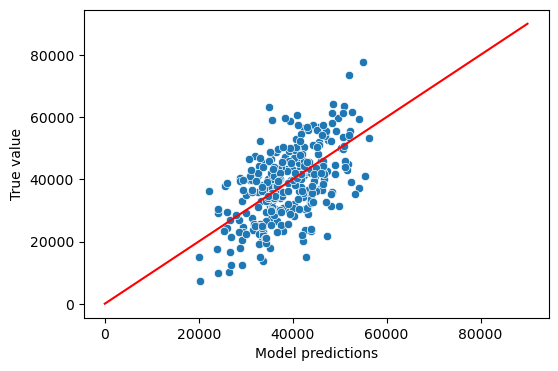

In [188]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred,y=Y_test)
plt.xlabel("Model predictions")
plt.ylabel("True value")
sns.lineplot(x=[0,90000],y=[0,90000],color="r")
